In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/city_temperature_monthly.csv')

In [3]:
df = df[df.Year != 1995]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 12 to 299
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_By_Month   288 non-null    object 
 1   Month           288 non-null    int64  
 2   Day             288 non-null    int64  
 3   Year            288 non-null    int64  
 4   AvgTemperature  288 non-null    float64
 5   RefTemperature  288 non-null    float64
 6   Temp_Anomaly    288 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 18.0+ KB


In [5]:
#Set date as index
df.set_index('Date_By_Month', inplace=True)
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 1996-01-01 to 2019-12-01
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           288 non-null    int64  
 1   Day             288 non-null    int64  
 2   Year            288 non-null    int64  
 3   AvgTemperature  288 non-null    float64
 4   RefTemperature  288 non-null    float64
 5   Temp_Anomaly    288 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 15.8 KB


In [6]:
df2 = df[df.Year <= 2015]
df2

,Month,Day,Year,AvgTemperature,RefTemperature,Temp_Anomaly
Date_By_Month,,,,,,
1996-01-01,1,1,1996,5.558924,6.822478,-1.263554
1996-02-01,2,1,1996,7.216812,8.023549,-0.806737
1996-03-01,3,1,1996,9.431285,11.269077,-1.837792
1996-04-01,4,1,1996,14.576168,14.446167,0.130000
1996-05-01,5,1,1996,18.814664,18.561886,0.252778
...,...,...,...,...,...,...
2015-08-01,8,1,2015,24.082111,23.827333,0.254778
2015-09-01,9,1,2015,21.893950,19.964004,1.929946
2015-10-01,10,1,2015,17.328727,16.495522,0.833205


In [7]:
#Predictor variable
y = df2.Temp_Anomaly
type(y)

pandas.core.series.Series

In [8]:
y.describe()

count    240.000000
mean       0.502702
std        0.876334
min       -1.837792
25%       -0.121214
50%        0.468663
75%        1.019261
max        4.166303
Name: Temp_Anomaly, dtype: float64

<AxesSubplot:xlabel='Date_By_Month'>

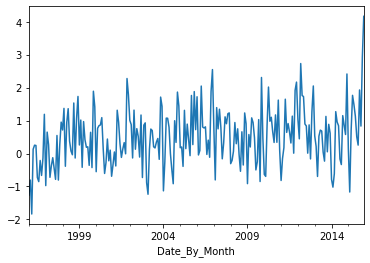

In [9]:
y.plot()

In [10]:
y2 = y.rolling(window=48).mean()
y2

Date_By_Month
1996-01-01         NaN
1996-02-01         NaN
1996-03-01         NaN
1996-04-01         NaN
1996-05-01         NaN
                ...   
2015-08-01    0.691229
2015-09-01    0.707786
2015-10-01    0.724944
2015-11-01    0.745688
2015-12-01    0.787305
Name: Temp_Anomaly, Length: 240, dtype: float64

In [11]:
y2.dropna(inplace=True)
y2

Date_By_Month
1999-12-01    0.170010
2000-01-01    0.184820
2000-02-01    0.217584
2000-03-01    0.273484
2000-04-01    0.288844
                ...   
2015-08-01    0.691229
2015-09-01    0.707786
2015-10-01    0.724944
2015-11-01    0.745688
2015-12-01    0.787305
Name: Temp_Anomaly, Length: 193, dtype: float64

<AxesSubplot:xlabel='Date_By_Month'>

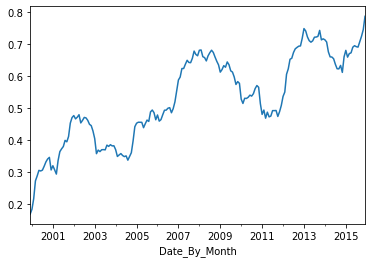

In [12]:
y2.plot()

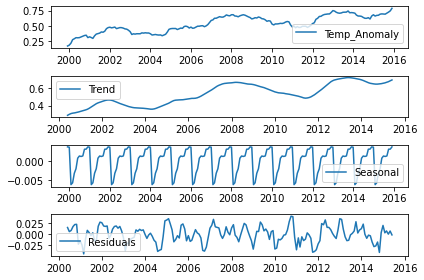

In [13]:
# Import seasonal_decompose 
from statsmodels.tsa.seasonal import seasonal_decompose

# Make a variable called decomposition, and assign it y passed to seasonal_decompose() 
decomposition = seasonal_decompose(y2)

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y2, label = 'Temp_Anomaly')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [14]:
#Test for stationarity
from statsmodels.tsa.stattools import kpss
kpss(y2, nlags="auto")

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.5575777775724602,
 0.01,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

P-value is smaller than 0.05, so the null hypothesis is rejected and we conclude that the data is non-stationary.

<AxesSubplot:xlabel='Date_By_Month'>

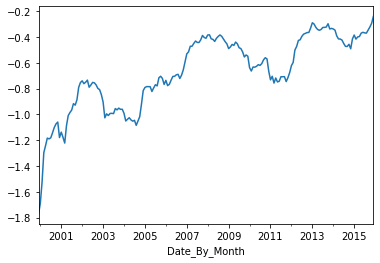

In [15]:
#Make constant variance with .log()
y_log = np.log(y2)
y_log.plot()

In [16]:
#Make constant mean with .diff()
kpss(y_log.diff().dropna(), nlags="auto")

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.2697177671571475,
 0.1,
 6,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

P-value is now 0.1 (>0.5), and so we can accept the null hypothesis that the data is stationary.

<AxesSubplot:xlabel='Date_By_Month'>

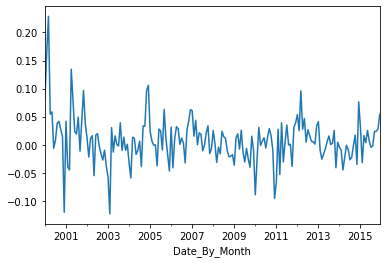

In [17]:
y_log.diff().dropna().plot()

In [18]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [19]:
# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split=int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

In [20]:
# Make a function to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p, d, q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [21]:
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [22]:
import warnings
warnings.filterwarnings("ignore")
#evaluate_models(y_log, p_values, d_values, q_values)

In [23]:
p = 0
d = 1
q = 1
model = ARIMA(y_log, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(49)

In [24]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Temp_Anomaly   No. Observations:                  192
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 351.358
Method:                       css-mle   S.D. of innovations              0.039
Date:                Wed, 19 Jan 2022   AIC                           -696.716
Time:                        13:24:06   BIC                           -686.943
Sample:                    01-01-2000   HQIC                          -692.758
                         - 12-01-2015                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0081      0.004      2.229      0.026       0.001       0.015
ma.L1.D.Temp_Anomaly     0.3026      0.064      4.745      0.000       0.178       0.428
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.3045           +0.0000j            3.3045            0.5000
-----------------------------------------------------------------------------
"""

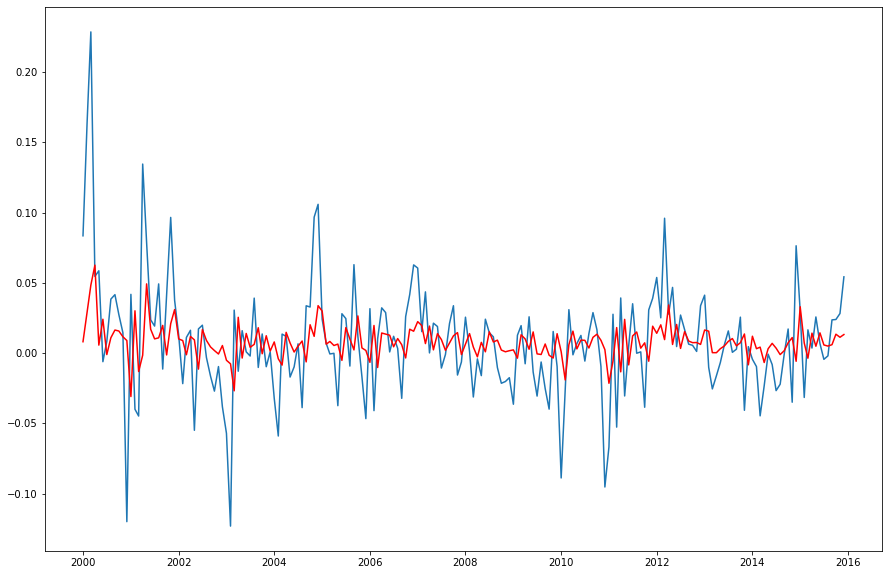

In [25]:
plt.figure(figsize=(15,10))
plt.plot(y_log.diff())
plt.plot(model_fit.predict(), color = 'red')

In [26]:
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period = len(forecast[0])
date_range = pd.date_range(y_log.index[-1], periods = forecast_period, 
              freq='MS').strftime("%Y-%m-%d").tolist()

# Convert that range into a dataframe that includes your predictions
# First, call DataFrame on pd
future_months = pd.DataFrame(date_range, columns = ['Month'])
# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_months['Month'] = pd.to_datetime(future_months['Month'])
future_months.set_index('Month', inplace = True)
future_months['Prediction'] = forecast[0]

# Plot your future predictions
#plt.figure(figsize=(15,10))
#plt.plot(y_log)
#plt.plot(y_log['Dec 2015'].append(future_months['Prediction']))
#plt.show()

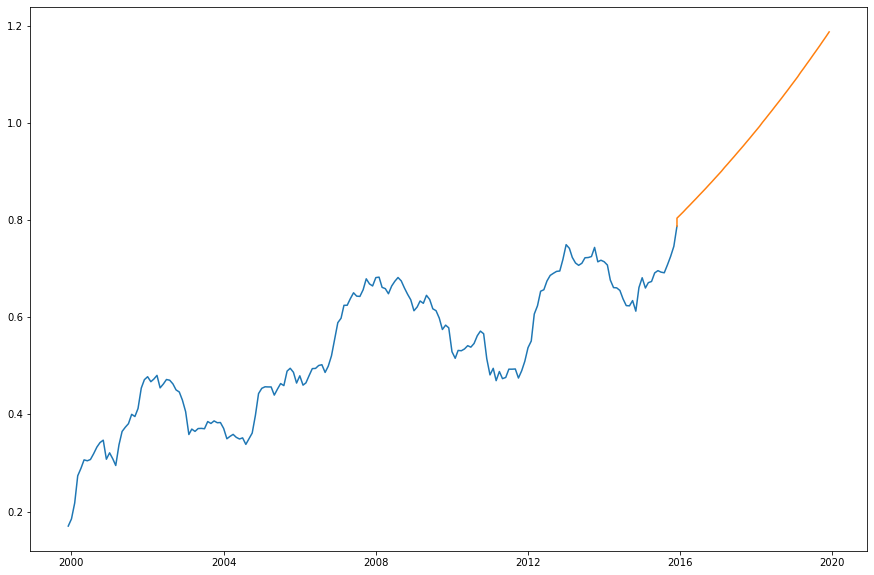

In [27]:
plt.figure(figsize=(15,10))
plt.plot(y2)
plt.plot(np.exp(y_log['Dec 2015'].append(future_months['Prediction'])))
plt.show()

In [28]:
#With values from 2016-2019
y3 = df.Temp_Anomaly.rolling(window=48).mean()
y3.dropna(inplace=True)
#y3.plot()

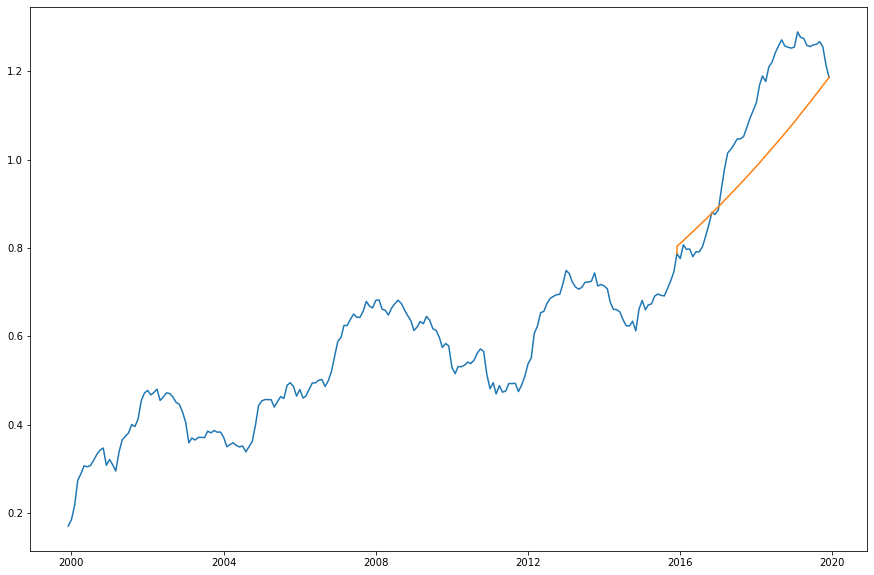

In [29]:
plt.figure(figsize=(15,10))
plt.plot(y3)
plt.plot(np.exp(y_log['Dec 2015'].append(future_months['Prediction'])))
plt.show()

In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [31]:
#y3['Dec 2015':]

In [32]:
#np.exp(future_months['Prediction'])

In [33]:
#Compare the error of the forecasted 4 years (2016-2019) with the original data
print('MAE:' + str(mean_absolute_error(y3['Dec 2015':], np.exp(future_months['Prediction']))))
print('MSE:' + str(mean_squared_error(y3['Dec 2015':], np.exp(future_months['Prediction']))))


MAE:0.10637863284907897
MSE:0.0157791919068706


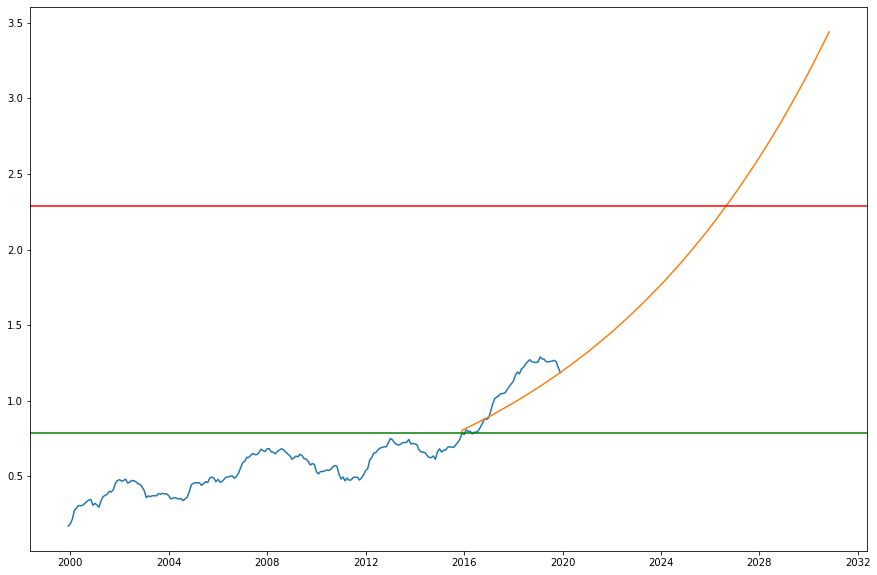

In [46]:
forecast = model_fit.forecast(180)

forecast_period = len(forecast[0])
date_range = pd.date_range(y_log.index[-1], periods = forecast_period, 
              freq='MS').strftime("%Y-%m-%d").tolist()

future_months2 = pd.DataFrame(date_range, columns = ['Month'])
future_months2['Month'] = pd.to_datetime(future_months2['Month'])
future_months2.set_index('Month', inplace = True)
future_months2['Prediction'] = forecast[0]

plt.figure(figsize=(15,10))
plt.plot(y3)
plt.plot(np.exp(y_log['Dec 2015'].append(future_months2['Prediction'])))

#Line for 1.5 threshold
plt.axhline(y= 1.5 + (y3['Dec 2015'].values), color='r', linestyle='-')
plt.axhline(y= (y3['Dec 2015'].values), color='g', linestyle='-')


plt.show()

In [35]:
pred = pd.DataFrame(np.exp(future_months2['Prediction']))
pred

,Prediction
Month,
2015-12-01,0.803652
2016-01-01,0.810207
2016-02-01,0.816815
2016-03-01,0.823477
2016-04-01,0.830194
...,...
2030-07-01,3.330003
2030-08-01,3.357164
2030-09-01,3.384546


In [36]:
pred[round(pred.Prediction, ndigits=2) == round((1.5 + (y3['Dec 2015'].values))[0], ndigits=2)]

,Prediction
Month,
2026-09-01,2.291727


In [37]:
(1.5 + (y3['Dec 2015'].values))[0]

2.287305056971522

According to the forecasted model, the average temperature will reach/exceed the 1.5 temperature threshold by September 2026.

<AxesSubplot:xlabel='Date_By_Month'>

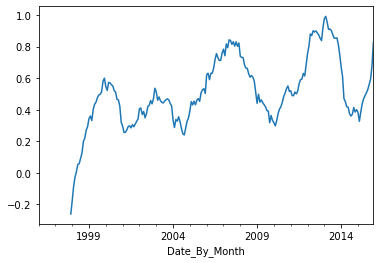

In [43]:
y.rolling(window=24).mean().plot()

<AxesSubplot:xlabel='Date_By_Month'>

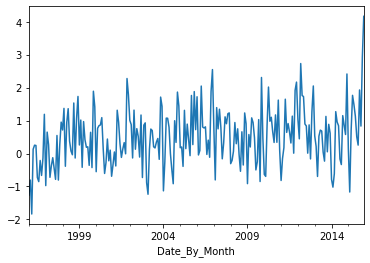

In [45]:
y.plot()